In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.style
matplotlib.style.use('ggplot')
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
#from sklearn.preprocessing import MinMaxScaler


C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
flights=pd.read_csv('ontime_per.csv')
airport=pd.read_csv('airport.csv')
carriers_dict = pd.Series.from_csv('carriers.csv').to_dict()


C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def Impute_month(cols):
    if cols in [1,2,3,4,5,6,7]:
        return "weekI"

    elif cols in [8,9,10,11,12,13,14]:
        return "weekII"

    elif cols in [15,16,17,18,19,20,21]:
        return "weekIII"

    elif cols in [22,23,24,25,26,27,28]:
        return "weekIV"

    else:
        return "weekV"
    
flights['Month'] = flights["DayofMonth"].apply(Impute_month)
flights.drop("DayofMonth", axis = 1, inplace = True)

In [4]:
def Impute_week(cols):
    if cols in [1,7]:
        return "Weekend"

    else:
        return "Weekdays"
    
    
flights['Week'] = flights["DayOfWeek"].apply(Impute_week)
flights.drop("DayOfWeek", axis = 1, inplace = True)

In [5]:
#new attribut for visualization
def impute_time(cols):
    if cols >= 600 and cols < 1200:
        return "Morning"
    elif cols >= 1200 and cols < 1600:
        return "Afternoon"
    else:
        return "Evening"
    
    
flights['Arrival_Time'] = flights["CRSArrTime"].apply(impute_time)
flights.drop("CRSArrTime", axis = 1, inplace = True)
flights['Departure_Time'] = flights["CRSDepTime"].apply(impute_time)

In [6]:
delay_types = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
flights[delay_types] = flights[delay_types].fillna(0)

In [7]:
c_flights = flights[flights.Cancelled == 1]
uc_flights = flights[flights.Cancelled == 0]

In [8]:
flights_by_carrier = uc_flights.groupby(by=['Carrier']).size().rename(carriers_dict)
cancelled_flights_by_carrier = c_flights.groupby(by=['Carrier']).size().rename(carriers_dict)
cancelled_flights_by_carrier

Carrier
American Airlines Inc.         2720
Alaska Airlines Inc.            139
JetBlue Airways                 897
Delta Air Lines Inc.            974
Atlantic Southeast Airlines    1427
Frontier Airlines Inc.           77
Hawaiian Airlines Inc.            4
Spirit Air Lines                308
Skywest Airlines Inc.           984
United Air Lines Inc.          1336
Virgin America                  159
Southwest Airlines Co.         2640
dtype: int64

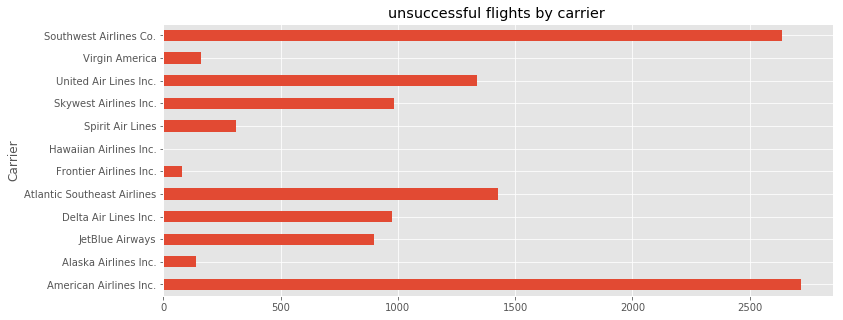

In [9]:
plt.figure(figsize=(12, 5))
p = cancelled_flights_by_carrier.plot(kind='barh')
fig = plt.title("unsuccessful flights by carrier ")

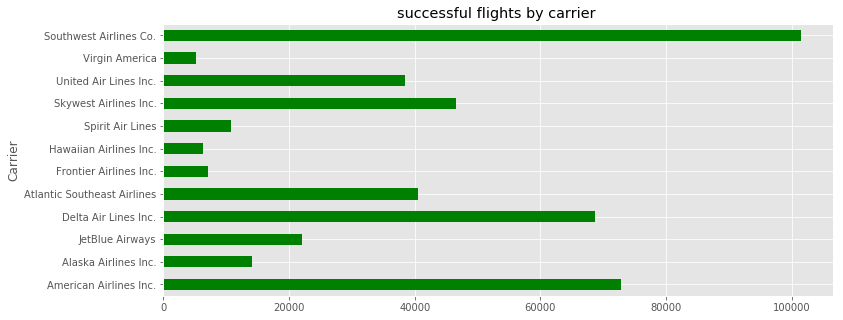

In [10]:
plt.figure(figsize=(12, 5))
p = flights_by_carrier.plot(kind='barh',color='green')
fig = plt.title("successful flights by carrier ")

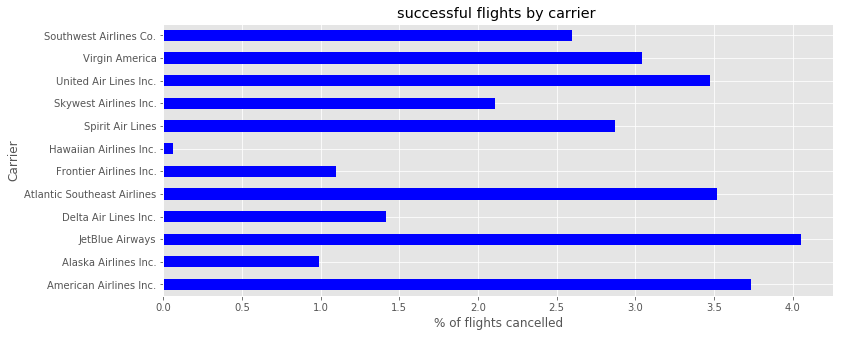

In [11]:
plt.figure(figsize=(12, 5))
p= ((cancelled_flights_by_carrier / flights_by_carrier) * 100).plot(kind='barh',color='blue')
p.set_ylabel("Carrier")
p.set_xlabel("% of flights cancelled")
fig = plt.title("successful flights by carrier ")

In [12]:
Month_grouped1 = flights.groupby('Month')["Cancelled"].sum()
Month_grouped2 = flights.groupby('Month')["Cancelled"].count()
print(Month_grouped1)
print(Month_grouped2)
Month_grouped = pd.concat([Month_grouped1, Month_grouped2],axis=1, keys=["sum", "count"])
Month_grouped["Average number of cancellations"] = Month_grouped["sum"]/Month_grouped["count"]
print(Month_grouped)

Month
weekI       905.0
weekII      891.0
weekIII     612.0
weekIV     9056.0
weekV       201.0
Name: Cancelled, dtype: float64
Month
weekI      103794
weekII     100842
weekIII     99603
weekIV     100779
weekV       40809
Name: Cancelled, dtype: int64
            sum   count  Average number of cancellations
Month                                                   
weekI     905.0  103794                         0.008719
weekII    891.0  100842                         0.008836
weekIII   612.0   99603                         0.006144
weekIV   9056.0  100779                         0.089860
weekV     201.0   40809                         0.004925


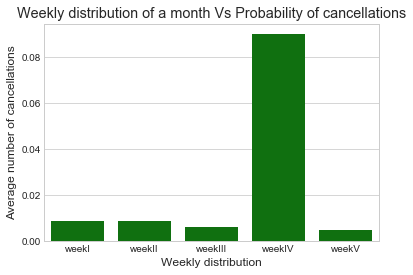

In [13]:
sns.set_style('whitegrid')
sns.barplot(x=Month_grouped.index, y ='Average number of cancellations', data=Month_grouped, color ='green')
plt.xlabel("Weekly distribution")
plt.ylabel("Average number of cancellations")
fig = plt.title("Weekly distribution of a month Vs Probability of cancellations")

In [14]:
week_grouped1 = flights.groupby('Week')["Cancelled"].sum()
week_grouped2 = flights.groupby('Week')["Cancelled"].count()
print(week_grouped1)
print(week_grouped2)
week_grouped = pd.concat([week_grouped1, week_grouped2],axis=1, keys=["sum", "count"])
week_grouped["Probability of cancellations"] = week_grouped["sum"]/week_grouped["count"]
print(week_grouped)

Week
Weekdays    7498.0
Weekend     4167.0
Name: Cancelled, dtype: float64
Week
Weekdays    314145
Weekend     131682
Name: Cancelled, dtype: int64
             sum   count  Probability of cancellations
Week                                                  
Weekdays  7498.0  314145                      0.023868
Weekend   4167.0  131682                      0.031644


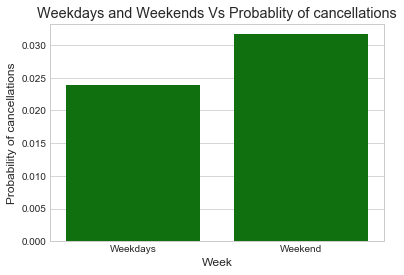

In [15]:
sns.set_style('whitegrid')
sns.barplot(x=week_grouped.index, y ='Probability of cancellations', data=week_grouped, color ='green')
plt.ylabel("Probability of cancellations")
fig = plt.title("Weekdays and Weekends Vs Probablity of cancellations")

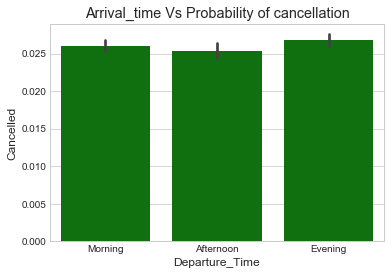

In [16]:
sns.set_style('whitegrid')
sns.barplot(x=flights.Departure_Time, y ="Cancelled", data=flights, color ='green')
fig = plt.title("Arrival_time Vs Probability of cancellation")

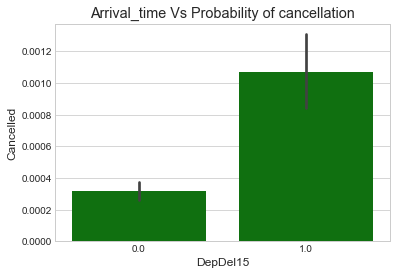

In [17]:
sns.set_style('whitegrid')
sns.barplot(x=flights.DepDel15, y ="Cancelled", data=flights, color ='green')
fig = plt.title("Arrival_time Vs Probability of cancellation")

In [18]:
cancelled_group = c_flights.groupby(['UniqueCarrier','CancellationCode']).size().reindex(fill_value=0.0).unstack().rename(carriers_dict)
cg = cancelled_group.fillna(0)
cancelled_group

CancellationCode,A,B,C
UniqueCarrier,,,
American Airlines Inc.,232.0,2440.0,48.0
Alaska Airlines Inc.,52.0,82.0,5.0
JetBlue Airways,65.0,807.0,25.0
Delta Air Lines Inc.,55.0,909.0,10.0
Atlantic Southeast Airlines,262.0,614.0,551.0
Frontier Airlines Inc.,5.0,72.0,NaN
Hawaiian Airlines Inc.,2.0,2.0,NaN
Spirit Air Lines,52.0,232.0,24.0
Skywest Airlines Inc.,126.0,766.0,92.0


In [19]:
b_bottom = cg.loc[:,'A'].values
b_bottom

array([ 232.,   52.,   65.,   55.,  262.,    5.,    2.,   52.,  126.,
         96.,   20.,  456.])

In [20]:
c_bottom = b_bottom + cg.loc[:,'B'].values
c_bottom

array([ 2672.,   134.,   872.,   964.,   876.,    77.,     4.,   284.,
         892.,  1215.,    20.,  2467.])

In [21]:
d_bottom = c_bottom + cg.loc[:,'B'].values
d_bottom

array([ 5112.,   216.,  1679.,  1873.,  1490.,   149.,     6.,   516.,
        1658.,  2334.,    20.,  4478.])

In [22]:
x = cg.loc[:,'A'].index.values
x

array(['American Airlines Inc.', 'Alaska Airlines Inc.', 'JetBlue Airways',
       'Delta Air Lines Inc.', 'Atlantic Southeast Airlines',
       'Frontier Airlines Inc.', 'Hawaiian Airlines Inc.',
       'Spirit Air Lines', 'Skywest Airlines Inc.',
       'United Air Lines Inc.', 'Virgin America', 'Southwest Airlines Co.'], dtype=object)

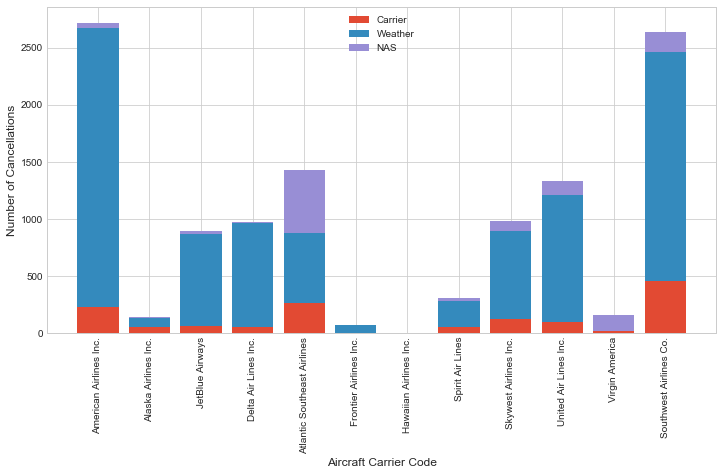

In [23]:
fig, ax = plt.subplots(figsize = (12,6))
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 90)
ax.bar(np.arange(len(x)),cg.loc[:,'A'].values, align='center', label='Carrier')
ax.bar(np.arange(len(x)),cg.loc[:,'B'].values, align='center', bottom=b_bottom, label='Weather')
ax.bar(np.arange(len(x)),cg.loc[:,'C'].values, align='center', bottom=c_bottom, label='NAS')
#ax.bar(np.arange(len(x)),cg.loc[:,'C'].values, align='center', bottom=c_bottom, label='NAS')

ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Number of Cancellations')

plt.legend()
plt.show()

In [24]:
airport.set_index('iata')
airports_from = airport.copy()
airports_from.columns = airports_from.columns.map(lambda x: 'origin_' + str(x))
flights = pd.merge(flights, airports_from, how='inner', left_on='Origin', right_on='origin_iata')
airports_to = airport.copy()
airports_to.columns = airport.columns.map(lambda x: 'dest_' + str(x))
flights = pd.merge(flights, airports_to, how='inner', left_on='Dest', right_on='dest_iata')

Text(0.5,1,'Weather cancellation based on their location')

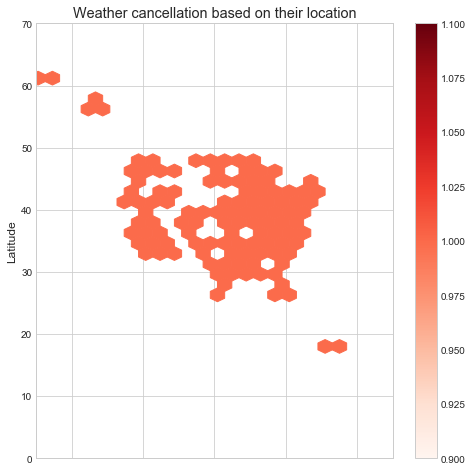

In [25]:
filtered = flights[flights['CancellationCode'] == 'B'][['origin_lat', 'origin_long', 'Cancelled']].copy()
ax = filtered.plot.hexbin(y='origin_lat', x='origin_long', C='Cancelled', gridsize=25, figsize=(8, 8),cmap='Reds')
plt.axis([-150, -50, 0, 70])
plt.xlabel('Longtitude')
plt.ylabel('Latitude')
plt.title('Weather cancellation based on their location')

In [26]:
filtered.head()

,origin_lat,origin_long,Cancelled
179,32.895951,-97.037200,1.0
381,40.639751,-73.778926,1.0
382,40.639751,-73.778926,1.0
557,41.979595,-87.904464,1.0
1008,38.747687,-90.359990,1.0


In [29]:
#flights.dropna(inplace = True)
flights.shape

(445112, 124)

In [190]:
flights.columns

Index(['Year', 'Quarter', 'Month', 'FlightDate', 'UniqueCarrier', 'AirlineID',
       'Carrier', 'TailNum', 'FlightNum', 'OriginAirportID',
       ...
       'origin_country', 'origin_lat', 'origin_long', 'dest_iata',
       'dest_airport', 'dest_city', 'dest_state', 'dest_country', 'dest_lat',
       'dest_long'],
      dtype='object', length=124)

In [193]:
flights1 = flights.drop(['FlightDate', 'AirlineID', 'Carrier', 'TailNum',
       'FlightNum', 'OriginAirportID', 'OriginAirportSeqID',
       'OriginCityMarketID', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac',
       'DepTime', 'DepDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'DepartureDelayGroups', 'DepTimeBlk', 'WheelsOff', 'Arrival_Time', 'origin_iata',
       'WheelsOn', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Diverted',
       'CRSElapsedTime', 'ActualElapsedTime','origin_city','dest_lat', 'dest_long',
       'origin_state','dest_iata','origin_lat','origin_long',
       'dest_airport', 'dest_city','CarrierDelay', 'FirstDepTime',
       'TotalAddGTime', 'LongestAddGTime', 'DivReachedDest',
       'DivActualElapsedTime', 'DivArrDelay', 'DivDistance', 'Div1Airport',
       'Div1AirportID', 'Div1AirportSeqID', 'Div1WheelsOn', 'Div1TotalGTime',
       'Div1LongestGTime', 'Div1WheelsOff', 'Div1TailNum', 'Div2Airport',
       'Div2AirportID', 'Div2AirportSeqID', 'Div2WheelsOn', 'Div2TotalGTime',
       'Div2LongestGTime', 'Div2WheelsOff', 'Div2TailNum', 'Div3Airport',
       'Div3AirportID', 'Div3AirportSeqID', 'Div3WheelsOn', 'Div3TotalGTime',
       'Div3LongestGTime', 'Div3WheelsOff', 'Div3TailNum', 'Div4Airport',
       'Div4AirportID', 'Div4AirportSeqID', 'Div4WheelsOn', 'Div4TotalGTime',
       'Div4LongestGTime', 'Div4WheelsOff', 'Div4TailNum', 'Div5Airport',
       'Div5AirportID', 'Div5AirportSeqID', 'Div5WheelsOn', 'Div5TotalGTime',
       'Div5LongestGTime', 'Div5WheelsOff', 'Div5TailNum', 'Unnamed: 109',
        'origin_airport', 'origin_country', 'dest_state','Year', 'Quarter','dest_country',
       'DistanceGroup', 'DivAirportLandings','TaxiIn','ArrDel15','Departure_Time','DepDel15','Flights'], axis = 1)

In [194]:
flights1.columns

Index(['Month', 'UniqueCarrier', 'Origin', 'Dest', 'CRSDepTime',
       'DepDelayMinutes', 'TaxiOut', 'Cancelled', 'CancellationCode',
       'AirTime', 'Distance', 'Week'],
      dtype='object')

In [195]:
flights1['total_delay'] = (flights['CarrierDelay'] + flights['WeatherDelay']
           + flights['NASDelay'] + flights['SecurityDelay'] + flights['LateAircraftDelay'])

In [196]:
flights1.columns

Index(['Month', 'UniqueCarrier', 'Origin', 'Dest', 'CRSDepTime',
       'DepDelayMinutes', 'TaxiOut', 'Cancelled', 'CancellationCode',
       'AirTime', 'Distance', 'Week', 'total_delay'],
      dtype='object')

In [197]:
#flights1=flights1.drop(['dest_state'],axis=1)

                 CRSDepTime  DepDelayMinutes   TaxiOut  Cancelled   AirTime  \
CRSDepTime         1.000000         0.069918 -0.046573   0.003202 -0.026078   
DepDelayMinutes    0.069918         1.000000  0.072896  -0.044923  0.029434   
TaxiOut           -0.046573         0.072896  1.000000  -0.277022  0.114717   
Cancelled          0.003202        -0.044923 -0.277022   1.000000 -0.249183   
AirTime           -0.026078         0.029434  0.114717  -0.249183  1.000000   
Distance          -0.017275         0.021892  0.033999   0.002649  0.932795   
total_delay        0.052002         0.961916  0.184808  -0.043411  0.023138   

                 Distance  total_delay  
CRSDepTime      -0.017275     0.052002  
DepDelayMinutes  0.021892     0.961916  
TaxiOut          0.033999     0.184808  
Cancelled        0.002649    -0.043411  
AirTime          0.932795     0.023138  
Distance         1.000000     0.006003  
total_delay      0.006003     1.000000  


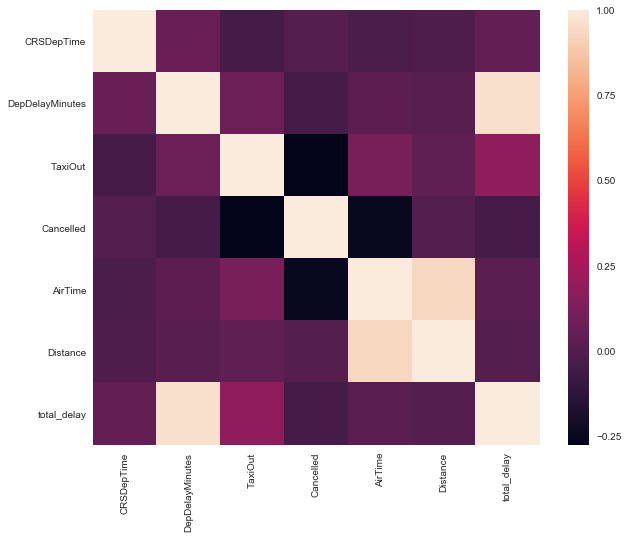

In [198]:
sns.set(style="white")
plt.figure(figsize = (10, 8))
corr = flights1.corr()
sns.heatmap(corr,  xticklabels=corr.columns, yticklabels=corr.columns)
print(corr)

In [199]:
flights1.drop(["DepDelayMinutes","AirTime"], axis = 1, inplace = True)

In [200]:
#flights1.drop(["origin_airport"], axis = 1, inplace = True)
flights1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445112 entries, 0 to 445111
Data columns (total 11 columns):
Month               445112 non-null object
UniqueCarrier       445112 non-null object
Origin              445112 non-null object
Dest                445112 non-null object
CRSDepTime          445112 non-null int64
TaxiOut             445112 non-null float64
Cancelled           445112 non-null float64
CancellationCode    445112 non-null object
Distance            445112 non-null float64
Week                445112 non-null object
total_delay         445112 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 60.8+ MB


In [201]:
flights1['Carrier mean distance'] = flights1['Distance'].groupby(flights1['UniqueCarrier']).transform('mean')
flights1['Origin TaxiOut'] = flights1['TaxiOut'].groupby(flights1['Origin']).transform('mean')
flights1['Origin Delay'] = flights1['total_delay'].groupby(flights1['Origin']).transform('mean')
flights1['Origin'] = flights1['Origin'].astype('category').cat.codes
flights1['Dest'] = flights1['Dest'].astype('category').cat.codes
flights1['CancellationCode'] = flights1['CancellationCode'].astype('category').cat.codes
flights1['Month'] = flights1['Month'].astype('category').cat.codes
flights1['Week'] = flights1['Week'].astype('category').cat.codes

flights1.fillna(0, inplace=True)

In [202]:
flights1.drop(["UniqueCarrier","CancellationCode","TaxiOut","total_delay"], axis = 1, inplace = True)

In [204]:
features = []
for i in flights1.columns:
    if i != "Cancelled":
        features.append(i)

In [208]:
X=flights1[features]
y=flights1['Cancelled']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=0)



In [207]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
y_pred_class = dtc.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)


0.96842002785807357

In [209]:
from sklearn.grid_search import GridSearchCV
#sample_split_range = list(range(1, 50))
param_grid = {"max_depth": list(range(1,10,1))}
grid = GridSearchCV(dtc, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

C:\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.9747703624774535
{'max_depth': 9}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [210]:
param_grid = {"criterion": ['entropy','gini'],  "max_depth": list(range(1,10,1))}
grid = GridSearchCV(dtc, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9750335389533279
{'criterion': 'entropy', 'max_depth': 9}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [212]:
predict=grid.predict(X_test)
confusion = metrics.confusion_matrix(y_test, predict)
print(confusion)

[[129880    133]
 [  3210    311]]


In [214]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred_class = rfc.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)

0.96682492848263368

In [215]:
param_grid = {"max_depth": list(range(1,10,1))}
grid = GridSearchCV(rfc, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9740867455340236
{'max_depth': 9}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [218]:
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=5)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

In [219]:
dtc = DecisionTreeClassifier(min_samples_split=4, random_state=0)
dtc.fit(X_train_selected, y_train)
metrics.accuracy_score(y_test, y_pred_class)

0.96682492848263368

In [221]:
param_grid = {"criterion": ['entropy','gini'],"max_depth": list(range(1,10,1))}
grid = GridSearchCV(dtc, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train_selected, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9752132692295348
{'criterion': 'gini', 'max_depth': 9}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [222]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train_selected, y_train)
y_pred_class = dtc.predict(X_test_selected)
metrics.accuracy_score(y_test, y_pred_class)

0.97472553806521189

In [223]:
param_grid = {"criterion": ['entropy','gini'],"max_depth": list(range(1,10,1))}
grid = GridSearchCV(rfc, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train_selected, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9740739076571516
{'criterion': 'entropy', 'max_depth': 9}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [224]:
predict=grid.predict(X_test_selected)
confusion = metrics.confusion_matrix(y_test, predict)
print(confusion)

[[130003     10]
 [  3511     10]]
